The Data set being used is UCI Machine Learning's "Online Shoppers Purchasing Intention Dataset Data Set".

Link:https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset

1. Mounting Data

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


2. Importing Libraries and Reading data

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/gdrive/My Drive/ML1 Course1 Sept 2020/Data/online_shoppers_intention.csv")
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
data.shape

(12330, 18)

3. Check for Null data

In [ ]:
data.isnull().sum(axis=0)

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

4. Encoding Categorical Data

In [ ]:
from sklearn.preprocessing import LabelEncoder
# area,sale_cond etc are character so convert it to numbers 

month_labelencoder = LabelEncoder()
data["Month"] = month_labelencoder.fit_transform(data["Month"])

visitor_labelencoder = LabelEncoder()
data["VisitorType"] = visitor_labelencoder.fit_transform(data["VisitorType"])

weekend_labelencoder = LabelEncoder()
data["Weekend"] = weekend_labelencoder.fit_transform(data["Weekend"])

revenue_labelencoder = LabelEncoder()
data["Revenue"] = revenue_labelencoder.fit_transform(data["Revenue"])

In [ ]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,1,0


5. Defining Input and Output

In [ ]:
Xcol = data.drop(columns = ["Revenue"])
ycol = data["Revenue"]

In [ ]:
X=np.array(Xcol)
y=np.array(ycol)
y.shape, X.shape

((12330,), (12330, 17))

In [ ]:
#We need to reshape y

y=np.reshape(y,(-1,1)) #-1 will automatically put the number of elements (12,300)
X.shape, y.shape

((12330, 17), (12330, 1))

6. Splitting data into Train and Test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 4)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9247, 17), (3083, 17), (9247, 1), (3083, 1))

7. Eucledian Distance Function

In [ ]:
import math
def euclidean_distance(point1, point2):
  sum_squared_distance = 0
  for i in range(len(point1)):
    sum_squared_distance += math.pow(point1[i] - point2[i], 2)
  return math.sqrt(sum_squared_distance)

In [ ]:
y_train[5]

array([0])

In [ ]:
y_train[5][0]

0

8. Creating knn function with three basic steps:
    
    a. Finding distance between test data and train data and store it along with the index.
    
    b. arrange the created indices according to ascending order of their respective distances and then replacing index values with respective outputs.
    
    c. Taking the mode of the 1st k outputs.

In [ ]:
from scipy import stats
import math
def knn(data, input_X, k, distance_fn): 
  predictions=[]   #list to store all predictions

  #for loop to make predictions for every sample in the input
  for i in range(len(input_X)):
    #store all the distances between the input and the training data
    #along with the index of the training data
    neighbor_distances_and_indices = []

    for index, train in enumerate(data): 
      #find the distance between the new input with every sample in the data
      distance = distance_fn(train[:-1], input_X[i])   

      #store the distance and the index w.r.t., the training samples   
      neighbor_distances_and_indices.append((distance, index)) 

    #sort the smallest to largest distance
    sorted_neighbor_distances_and_indices = sorted(neighbor_distances_and_indices)
    
    #pick the first K distances
    k_nearest_distances_and_indices = sorted_neighbor_distances_and_indices[:k] 
    
    # find the value of y in the training data for the first k distances
    k_nearest_labels = [y_train[i][0]for distance, i in k_nearest_distances_and_indices]
    
    # find the most common value of y 
    prediction=(stats.mode(k_nearest_labels))

    #append the predicited value to the total_predictions list
    predictions.append(prediction.mode[0])
      
  return predictions # returns the list of all predictions for a given input

9. Checking time complexity issues

In [ ]:
%%time
#prediciting the 0th data
clf_query = X_test[:1]
y_pred = knn(X_train, clf_query, k=5, distance_fn = euclidean_distance)
print(y_pred)

[0]
CPU times: user 134 ms, sys: 0 ns, total: 134 ms
Wall time: 138 ms


10. Predictions

In [ ]:
#Predicting the entire test data
clf_query = X_test
y_pred = knn(X_train, clf_query, k=5, distance_fn = euclidean_distance)
print(y_pred)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 

11. Classification Report

In [ ]:
#Classification Report

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2610
           1       0.58      0.29      0.39       473

    accuracy                           0.86      3083
   macro avg       0.73      0.63      0.66      3083
weighted avg       0.84      0.86      0.84      3083



12. Calculating accuracy

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test,y_pred) * 100
print(f"Accuracy = {round(accuracy,2)}%")

Accuracy = 85.96%


#KNN Using sklearn

In [ ]:
y_train_raveled = y_train.ravel()

In [ ]:
%%time
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(algorithm = 'brute', n_neighbors = 4)
classifier.fit(X_train,y_train_raveled)

CPU times: user 1.67 ms, sys: 0 ns, total: 1.67 ms
Wall time: 1.68 ms


In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[2543   67]
 [ 367  106]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2610
           1       0.61      0.22      0.33       473

    accuracy                           0.86      3083
   macro avg       0.74      0.60      0.62      3083
weighted avg       0.83      0.86      0.83      3083



We observe that:
    
    a. Number of 1s is much less than number of 0s
    b. Out of the 473 1s, 367 are falsely predicted as 0.

In [ ]:
#Finding appropriate K values
error = []

#Calculating errors for k values between 0 and 1
for i in range(1,3):
    print(f"i = {i}")
    pred = knn(X_train, X_test, k=i, distance_fn = euclidean_distance)
    print("Done")
    accuracy = accuracy_score(pred, y_test) * 100
    error.append(100 - accuracy)

i = 1
Done
i = 2
Done


Text(0, 0.5, 'Mean Error')

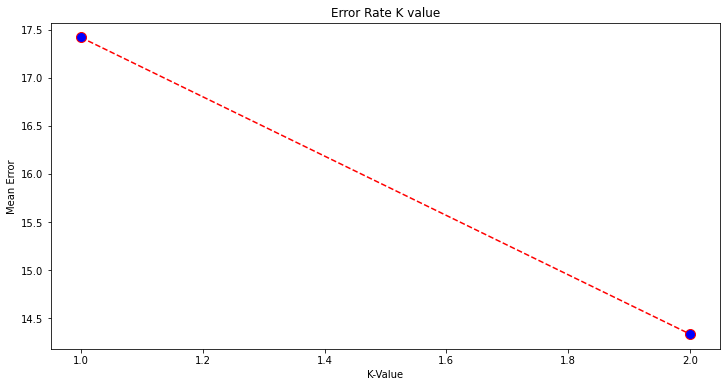

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(range(1,3), error, color = "red", linestyle = "dashed", marker = 'o', markerfacecolor = "blue", markersize = 10)
plt.title("Error Rate K value")
plt.xlabel('K-Value')
plt.ylabel('Mean Error')

In [ ]:
#Finding appropriate K values
error = []

#Calculating errors for k values between 0 and 1
for i in range(1,10):
    print(f"k value = {i}")
    knn = KNeighborsClassifier(algorithm = 'brute', n_neighbors = i)
    knn.fit(X_train,y_train_raveled)
    pred_i = knn.predict(X_test)
    
    print(classification_report(y_test, pred_i))
    accuracy = accuracy_score(pred_i, y_test) * 100
    error.append(100 - accuracy)

k value = 1
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      2610
           1       0.43      0.39      0.41       473

    accuracy                           0.83      3083
   macro avg       0.66      0.65      0.65      3083
weighted avg       0.82      0.83      0.82      3083

k value = 2
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2610
           1       0.60      0.20      0.30       473

    accuracy                           0.86      3083
   macro avg       0.73      0.59      0.61      3083
weighted avg       0.83      0.86      0.83      3083

k value = 3
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      2610
           1       0.51      0.33      0.40       473

    accuracy                           0.85      3083
   macro avg       0.70      0.63      0.66      3083
weighted avg       0.83      0.85     

Text(0, 0.5, 'Mean Error')

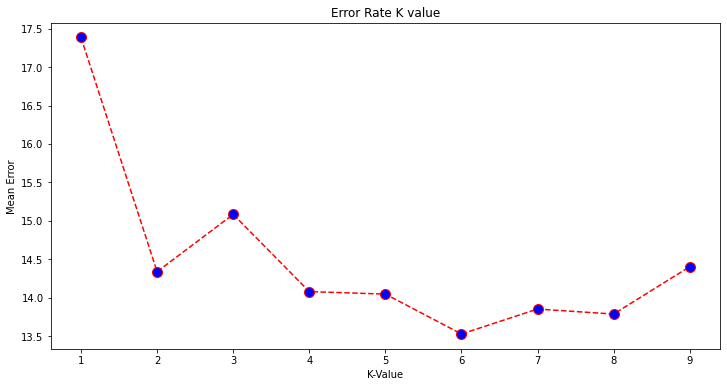

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(range(1,10), error, color = "red", linestyle = "dashed", marker = 'o', markerfacecolor = "blue", markersize = 10)
plt.title("Error Rate K value")
plt.xlabel('K-Value')
plt.ylabel('Mean Error')

#Dealing with Undersampled Data

In [ ]:
#We use Synthetic Minority Oversampling Technique (SMOTENC)

from imblearn.over_sampling import SMOTENC

oversampling = SMOTENC(categorical_features = [0,2,4,10,11,12,13,14,15,16])

In [ ]:
y = np.ravel(y)
r_x, r_y = oversampling.fit_resample(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
r_x.shape, r_y.shape

In [ ]:
print(f"Before Oversampling, counts of label '1' = {sum(y==1)}")
print(f"Before Oversampling, counts of label '0' = {sum(y==0)}")

print(f"After Oversampling, counts of label '1' = {sum(r_y==1)}")
print(f"After Oversampling, counts of label '0' = {sum(r_y==0)}")

Before Oversampling, counts of label '1' = 1908
Before Oversampling, counts of label '0' = 10422
After Oversampling, counts of label '1' = 10422
After Oversampling, counts of label '0' = 10422


In [ ]:
from sklearn.model_selection import train_test_split
rx_train, rx_test, ry_train, ry_test = train_test_split(r_x, r_y, test_size = 0.25)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(algorithm = 'brute', n_neighbors = 6)
classifier.fit(rx_train,ry_train)

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [ ]:
ry_pred = classifier.predict(rx_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(ry_test, ry_pred))
print(classification_report(ry_test, ry_pred))

[[2163  463]
 [ 363 2222]]
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      2626
           1       0.83      0.86      0.84      2585

    accuracy                           0.84      5211
   macro avg       0.84      0.84      0.84      5211
weighted avg       0.84      0.84      0.84      5211

